In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris= load_iris()

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [9]:
df['target']=iris.target
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])

In [10]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

In [11]:
from sklearn.model_selection import train_test_split
X=df.drop(['target','flower_name'],axis='columns')
Y=df.target

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [15]:
knn.score(X_test, Y_test)

0.9666666666666667

In [17]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

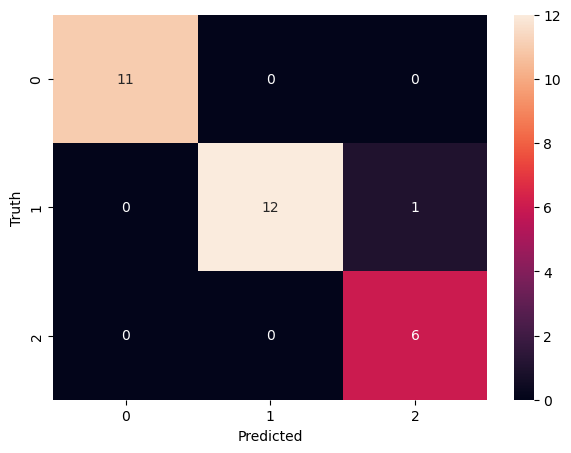

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')